<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preproccessing


### Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("/content/Churn_Modelling.csv")
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("/content/Churn_Modelling.csv")

# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.13306037414347546
Mean Squared Error: 0.13306037414347546
R-squared: 0.1572470052713053


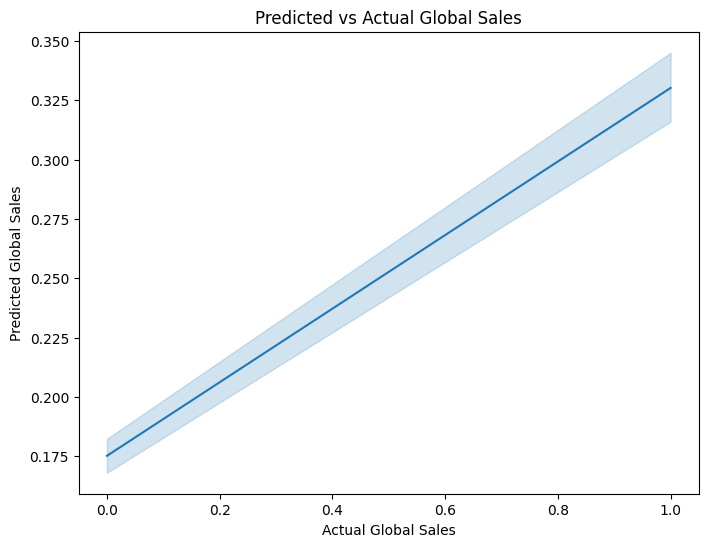

In [ ]:




# Scatter plot of predicted vs actual global sales
plt.figure(figsize=(8, 6))
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Predicted vs Actual Global Sales')
plt.show()

## Random Forest

## Explanation of the Random Forest ML Algorithm

#### In this code, we use the RandomForestClassifier from the sklearn.ensemble module to create and train the Random Forest model. We then make predictions on the test set and evaluate the model's accuracy using the accuracy_score metric.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("/content/Churn_Modelling.csv")


# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.866


## XGBoost Machine Learning Model

In [ ]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.866


## Support Vector Machine SVM

In [ ]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


In [ ]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_SVM)

Accuracy: 0.8035


## Artificial Neural Network ANN

In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import warnings


In [6]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the ANN model
model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc_ANN = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_ANN)

Accuracy: 0.8645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Voting Classifier

In [7]:

# Import python libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
import warnings


# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the individual classifiers
classifier1 = DecisionTreeClassifier(random_state=42)
classifier2 = LogisticRegression(random_state=42)
classifier3 = SVC(random_state=42)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('dt', classifier1), ('lr', classifier2), ('svm', classifier3)],
    voting='hard'
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.862


# Stochastic Gradient Descent Classification
##### Stochastic Gradient Descent (SGD) is popular in the neural network world, where it’s used to optimize the cost function. However, we can also use it to classify data. SGD is great for scenarios in which you have a large dataset with a very large feature set. It can help to reduce the complexities involved in learning from highly variable data.

### In this code, we use the SGDClassifier from the sklearn.linear_model module to create and train the Stochastic Gradient Descent (SGD) Classifier. We split the data into training and testing sets, perform feature scaling using StandardScaler, and then train the classifier.

##### By using the ColumnTransformer and OneHotEncoder from the sklearn.preprocessing module, we transform the "Geography" and "Gender" columns into numerical values before training the SGD Classifier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SGD Classifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7855


## Naive Bayes Algorithm

#### The Naive Bayes algorithm determines the probability of each feature set and uses that to determine the probability of the classification itself.

###### In this modified code, we use the OneHotEncoder from the sklearn.preprocessing module to encode the "Geography" and "Gender" columns into numerical values. We then split the encoded data into training and testing sets and proceed with creating and training the Naive Bayes classifier.

In [ ]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train.toarray(), y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test.toarray())

# Evaluate the model
acc_Naive = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_Naive)

Accuracy: 0.225


## K-Nearest Neighbor Algorithm


###### The k-nearest neighbor (KNN) algorithm is a simple and efficient algorithm that can be used to solve both classification and regression problems. If you know the saying, “birds of a feather flock together” you have the essence of KNN in a nutshell. It assumes that similar “things” exist in close proximity to each other.

###### Although you need to perform a certain amount of data cleansing before applying the algorithm, the benefits outweigh the burdens. Let’s have a look:

#### In this code, I use the KNeighborsClassifier class from the sklearn.neighbors module to create and train a K-Nearest Neighbors classifier. We split the data into training and testing sets, and then train the classifier using the training set

#### Afterwards, I use the OneHotEncoder from the sklearn.preprocessing module to encode the "Geography" and "Gender" columns into numerical values. We then split the encoded data into training and testing sets and proceed with creating and training the K-Nearest Neighbors classifier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train.toarray(), y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.816


## Decision Tree Algorithm

#### The Decision Tree algorithm can be surprisingly effective for such a simple algorithm. It focuses on learning simple decision rules inferred from the data. It then compiles them into a set of “if-then-else” decision rules

### In this code, I use the DecisionTreeClassifier class from the sklearn.tree module to create and train a Decision Tree classifier. We split the data into training and testing sets, and then train the classifier using the training set.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train.toarray(), y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435


## TOP ML Algorithm
### To rank and recommend the best algorithm for the given dataset, we can use the cross_val_score function from the sklearn.model_selection module to evaluate the performance of each algorithm through cross-validation. We will compare the accuracy scores of different algorithms and recommend the one with the highest score.

In [8]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Select the features and target variable
X = data.iloc[:, 3:-1]  # Select columns from 'CreditScore' to 'EstimatedSalary'
y = data["Exited"]

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Define the list of classifiers to evaluate
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]

# Perform cross-validation and evaluate the classifiers
results = []
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X_encoded, y, cv=5)
    results.append((name, scores.mean()))

# Sort the results based on the mean accuracy score
results.sort(key=lambda x: x[1], reverse=True)

# Print the rankings and recommend the best algorithm
print("Algorithm Rankings:")
for i, (name, score) in enumerate(results, start=1):
    print(f"{i}. {name}: {score}")

best_algorithm = results[0][0]
print(f"\nRecommendation: The best algorithm is {best_algorithm}.")

Algorithm Rankings:
1. Random Forest: 0.8620000000000001
2. SVM: 0.7963
3. Decision Tree: 0.7917
4. Naive Bayes: 0.7852
5. K-Nearest Neighbors: 0.766

Recommendation: The best algorithm is Random Forest.


# Recommendation: The best algorithm is Random Forest.

## Based on the results
### Algorithm Rankings:
### 1. Random Forest: 0.8620000000000001
### 2. SVM: 0.7963
### 3. Decision Tree: 0.7917
### 4. Naive Bayes: 0.7852
### 5. K-Nearest Neighbors: 0.766

# Recommendation: The best algorithm is Random Forest.